In [1]:
import numpy as np
import os
import sys
from six.moves import cPickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.layers import Conv2D, Activation, BatchNormalization, Input, Dropout
from keras.layers import AveragePooling2D, Flatten, MaxPooling2D, Dense
from keras.models import Model
import keras

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
num_classes = 10
batch_size = 100
epochs = 50
steps_per_epoch =  int(40000/batch_size)

train_x shape: (40000, 32, 32, 3)
40000 train samples


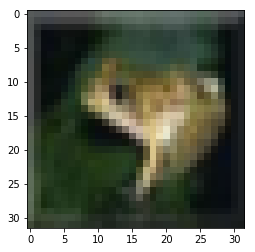

In [3]:
def load_data():
    # Modify path string. use your path which your dataset is in
    path =  r'C:\Users\strea\Links\baseline_code_final (2)'
    fpath = os.path.join(path, 'train_data')
    
    with open(fpath, 'rb') as f:
        d = cPickle.load(f, encoding='bytes')
    X_train = d['data']
    y_train = d['labels']
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32) # 3072개 숫자가 한줄로 이어진 배열 하나를 32x32짜리 배열 3개로 만듦
    X_train = X_train.transpose(0, 2, 3, 1)
    y_train = np.reshape(y_train, (len(y_train), 1))
    return X_train, y_train

train_x, train_y = load_data()
print('train_x shape:', train_x.shape)
print(train_x.shape[0], 'train samples')
plt.imshow(train_x[5])
plt.show()

In [4]:
# random state는 전체 데이터셋에서 train set의 비율을 의미함 0~1 사이의 값을 입력함
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, random_state=0)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((30000, 32, 32, 3), (10000, 32, 32, 3), (30000, 10), (10000, 10))

In [5]:
def simple_net(x,kernel_size=32, dropsize=0.2):
    for i in range(3):
        x = Conv2D(kernel_size,(3,3), padding='same')(x)
        x = Activation('relu')(x)
        x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(dropsize)(x)
    return x

In [6]:
inputs = Input(shape=x_train.shape[1:]) # 텐서로 만들어줌
x = simple_net(inputs)
x = simple_net(x,kernel_size=64, dropsize=0.3)
x = simple_net(x,kernel_size=128, dropsize=0.4)
# x = simple_net(x,kernel_size=256, dropsize=0.5)
x = AveragePooling2D(pool_size=2)(x)
y = Flatten()(x)
outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activat

In [7]:
# opt_rms = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)    
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

datagen.fit(x_train)

In [9]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    workers=4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
400/400 [==============================] - 26s 65ms/step - loss: 1.6284 - acc: 0.4351
Epoch 2/50
400/400 [==============================] - 22s 54ms/step - loss: 1.1645 - acc: 0.5847
Epoch 3/50
400/400 [==============================] - 22s 54ms/step - loss: 0.9789 - acc: 0.6532
Epoch 4/50
400/400 [==============================] - 22s 54ms/step - loss: 0.8579 - acc: 0.7004
Epoch 5/50
400/400 [==============================] - 21s 54ms/step - loss: 0.7829 - acc: 0.7245
Epoch 6/50
400/400 [==============================] - 22s 54ms/step - loss: 0.7302 - acc: 0.7440
Epoch 7/50
400/400 [==============================] - 22s 54ms/step - loss: 0.6751 - acc: 0.7637
Epoch 8/50
400/400 [==============================] - 22s 54ms/step - loss: 0.6423 - acc: 0.7768
Epoch 9/50
400/400 [==============================] - 22s 54ms/step - loss: 0.6099 - acc: 0.7866
Epoch 10/50
400/400 [==============================] - 22s 54ms/step - loss: 0.

## 테스트결과

batch 10 / epoch 100 / conv(32, 3,3) + elu + batch 9번 + maxpool(2,2) + dropout(0.2)

In [10]:
# scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
# print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 4s 437us/step

Test result: 82.580 loss: 0.600


batch_size = 100, epochs = 50 

conv(32,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.2)<br>
conv(32,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.3)<br>
conv(32,3,3) + elu + batch 3번 + maxpool(3,3) + dropout(0.4)

In [10]:
# scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
# print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 2s 159us/step

Test result: 80.540 loss: 0.591


batch_size = 100, epochs = 50 

conv(<b>32</b>,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.2)<br>
conv(<b>64</b>,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.3)<br>
conv(<b>128</b>,3,3) + elu + batch 3번 + maxpool(3,3) + dropout(0.4)

In [10]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 2s 210us/step

Test result: 85.970 loss: 0.479


batch_size = 10, epochs = 50 - 130초씩 걸림

conv(<b>32</b>,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.2)<br>
conv(<b>64</b>,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.3)<br>
conv(<b>128</b>,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.4)<br>
conv(<b>256</b>,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.5)

In [11]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 3s 253us/step

Test result: 87.050 loss: 0.421


## 옵티마이저 변경

batch_size = 100, epochs = 50  keras.optimizers.rmsprop(lr=0.001, decay=1e-6)  -> <b> 옵티마이저 adam </b> 22초 걸림

conv(32,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.2)<br>
conv(64,3,3) + elu + batch 3번 + maxpool(2,2) + dropout(0.3)<br>
conv(128,3,3) + elu + batch 3번 + maxpool(3,3) + dropout(0.4)

In [10]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 2s 202us/step

Test result: 86.080 loss: 0.496
